In [164]:
# Import packages
import pandas as pd # enables us to read csv and excel files
import geopandas as gpd
from shapely.geometry import Point # we need to turn lat lon into points on globe
%matplotlib inline 

In [165]:
url = 'https://wfs-kbhkort.kk.dk/k101/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=k101:station_oversigtskort&outputFormat=json&SRSNAME=EPSG:4326' 

station = gpd.read_file(url)

# Inspect data
station.head(60)

,id,objekt_type,navn,kommune,geometry
0,44,Metrostation,Kastrup,Tårnby,MULTIPOINT (12.64682 55.63582)
1,45,S-station,Langgade,København,MULTIPOINT (12.50399 55.66718)
2,46,S-station,Peter Bangs Vej,Frederiksberg,MULTIPOINT (12.50334 55.67817)
3,47,S-station,KB Hallen,København,MULTIPOINT (12.49216 55.67791)
4,50,S-station,Vigerslev Allé,København,MULTIPOINT (12.49908 55.65973)
5,52,S-station,Flintholm,Frederiksberg,MULTIPOINT (12.49836 55.68533)
6,53,Metrostation,Forum,Frederiksberg,MULTIPOINT (12.55250 55.68184)
7,54,Metrostation,Frederiksberg,Frederiksberg,MULTIPOINT (12.53125 55.68124)
8,55,Metrostation,Fasanvej (Solbjerg),Frederiksberg,MULTIPOINT (12.52353 55.68162)
9,56,Metrostation,Lindevang,Frederiksberg,MULTIPOINT (12.51334 55.68339)


In [166]:
# Fetch only metrostations
metrostation = station.loc[(station['objekt_type'] == 'Metrostation')]

# Remove the station in Municpality of Tårnby
metrostation = metrostation[metrostation.kommune != 'Tårnby']

metrostation.reset_index(drop=True,inplace=True)
metrostation

,id,objekt_type,navn,kommune,geometry
0,53,Metrostation,Forum,Frederiksberg,MULTIPOINT (12.55250 55.68184)
1,54,Metrostation,Frederiksberg,Frederiksberg,MULTIPOINT (12.53125 55.68124)
2,55,Metrostation,Fasanvej (Solbjerg),Frederiksberg,MULTIPOINT (12.52353 55.68162)
3,56,Metrostation,Lindevang,Frederiksberg,MULTIPOINT (12.51334 55.68339)
4,57,Metrostation,Flintholm,Frederiksberg,MULTIPOINT (12.49965 55.68592)
5,58,Metrostation,Vanløse,København,MULTIPOINT (12.49191 55.68729)
6,21,Metrostation,Femøren,København,MULTIPOINT (12.63826 55.64529)
7,22,Metrostation,Amager Strand,København,MULTIPOINT (12.63189 55.65607)
8,23,Metrostation,Øresund,København,MULTIPOINT (12.62873 55.66145)
9,24,Metrostation,Lergravsparken,København,MULTIPOINT (12.61702 55.66227)


In [167]:
# Import packages
import re
import numpy as np

In [172]:
metrostation['geometry_str'] = metrostation['geometry'].astype(str)
metrostation.head()

,id,objekt_type,navn,kommune,geometry,lat,lng,geometry_str
0,53,Metrostation,Forum,Frederiksberg,MULTIPOINT (12.55250 55.68184),NaN,NaN,MULTIPOINT (12.55250252831948 55.68183658102229)
1,54,Metrostation,Frederiksberg,Frederiksberg,MULTIPOINT (12.53125 55.68124),NaN,NaN,MULTIPOINT (12.53125429700097 55.68124300422948)
2,55,Metrostation,Fasanvej (Solbjerg),Frederiksberg,MULTIPOINT (12.52353 55.68162),NaN,NaN,MULTIPOINT (12.52353141301106 55.68161867111091)
3,56,Metrostation,Lindevang,Frederiksberg,MULTIPOINT (12.51334 55.68339),NaN,NaN,MULTIPOINT (12.51333703050086 55.68339344818599)
4,57,Metrostation,Flintholm,Frederiksberg,MULTIPOINT (12.49965 55.68592),NaN,NaN,MULTIPOINT (12.49964645088805 55.68592249094199)


In [178]:
# define reg pattern
lat_lng_pattern = re.compile(r"\((.*) \s*(.*)\)")

# define function for extraction (should be placed in `.py` module!)
def extract_lng_lat(address):
    try: 
        lng_lat_match = lat_lng_pattern.search(address)
        lng = float(lng_lat_match.group(1))
        lat = float(lng_lat_match.group(2))
        return (lng,lat)
    except:
        return (np.NaN, np.NaN)

lng_lats = [extract_lat_lng(location) for location in metrostation.loc[:,'geometry_str']]
metrostation['lng'] = [lat for lat, lng in lng_lats]
metrostation['lat'] =  [lng for lat, lng in lng_lats]
metrostation.head()

,id,objekt_type,navn,kommune,geometry,lat,lng,geometry_str
0,53,Metrostation,Forum,Frederiksberg,MULTIPOINT (12.55250 55.68184),55.681837,12.552503,MULTIPOINT (12.55250252831948 55.68183658102229)
1,54,Metrostation,Frederiksberg,Frederiksberg,MULTIPOINT (12.53125 55.68124),55.681243,12.531254,MULTIPOINT (12.53125429700097 55.68124300422948)
2,55,Metrostation,Fasanvej (Solbjerg),Frederiksberg,MULTIPOINT (12.52353 55.68162),55.681619,12.523531,MULTIPOINT (12.52353141301106 55.68161867111091)
3,56,Metrostation,Lindevang,Frederiksberg,MULTIPOINT (12.51334 55.68339),55.683393,12.513337,MULTIPOINT (12.51333703050086 55.68339344818599)
4,57,Metrostation,Flintholm,Frederiksberg,MULTIPOINT (12.49965 55.68592),55.685922,12.499646,MULTIPOINT (12.49964645088805 55.68592249094199)


In [179]:
metrostation = metrostation.drop('geometry_str', axis=1)
metrostation

,id,objekt_type,navn,kommune,geometry,lat,lng
0,53,Metrostation,Forum,Frederiksberg,MULTIPOINT (12.55250 55.68184),55.681837,12.552503
1,54,Metrostation,Frederiksberg,Frederiksberg,MULTIPOINT (12.53125 55.68124),55.681243,12.531254
2,55,Metrostation,Fasanvej (Solbjerg),Frederiksberg,MULTIPOINT (12.52353 55.68162),55.681619,12.523531
3,56,Metrostation,Lindevang,Frederiksberg,MULTIPOINT (12.51334 55.68339),55.683393,12.513337
4,57,Metrostation,Flintholm,Frederiksberg,MULTIPOINT (12.49965 55.68592),55.685922,12.499646
5,58,Metrostation,Vanløse,København,MULTIPOINT (12.49191 55.68729),55.687288,12.491907
6,21,Metrostation,Femøren,København,MULTIPOINT (12.63826 55.64529),55.645285,12.638256
7,22,Metrostation,Amager Strand,København,MULTIPOINT (12.63189 55.65607),55.656065,12.631890
8,23,Metrostation,Øresund,København,MULTIPOINT (12.62873 55.66145),55.661446,12.628733
9,24,Metrostation,Lergravsparken,København,MULTIPOINT (12.61702 55.66227),55.662270,12.617021


# Final data on zip codes

In [ ]:
metrostation

# Some plotting

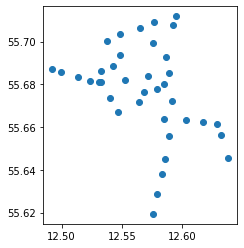

In [182]:
metrostation.plot();

In [185]:
import folium
# Create array for folium called urban_location
Copenhagen_location = [55.6761, 12.5689]

# Construct a folium map with copenhagen_location
Copenhagen_map = folium.Map(
    location=Copenhagen_location,
    zoom_start=12
)

# Insert ladestandere
folium.GeoJson(metrostation).add_to(Copenhagen_map)

# Display the map
display(Copenhagen_map)